In [13]:
import yaml
from enum import Enum, auto
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
import numpy as np


def read_results(file):
    with open(file, 'r') as istream:
        return yaml.full_load(istream)


def find_variable_parameter(results):
    for key, value in results.items():
        if isinstance(value, list) and key != "result":
            return key, value


def group_by_key(step_results):
    groupped_by = defaultdict(list)
    for step in step_results:
        for k, v in step.items():
            groupped_by[k].append(
                v if isinstance(v, (int, float)) else -1
            )
    return groupped_by


def plot_results(results, fig = None, axes = None, annotate = False):
    label = results['Architecture kind']
    if axes is None:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[16, 9])
    
    parameter, range_values = find_variable_parameter(results)
    x_values = np.array(list(range(*range_values)))
    
    metrics = {k: np.array(v) for k, v in group_by_key(results['result']).items()}
    
    for ax, (metric_name, y_values) in zip(axes, metrics.items()):
        mask = y_values >= 0
        ax.plot(x_values[mask], y_values[mask], label=label)
        
        if not annotate:
            continue

        ax.set_xlabel(parameter)
        ax.set_title(metric_name)
        ax.grid()
        ax.legend()
    
    return fig, axes


class ParameterName(Enum):
    N = auto()
    M = auto()
    DELTA = auto()

    @staticmethod
    def as_folder_name(value):
        if (value == ParameterName.N):
            return "n_elements"
        if (value == ParameterName.M):
            return "n_clients"
        if (value == ParameterName.DELTA):
            return "delta"


def plot_comparison(parameter_name):
    folder = Path(ParameterName.as_folder_name(parameter_name))
    fig = None
    axes = None
    prefixes = ["SYNC*", "ASYN*", "NONB*"]
    for i, pref in enumerate(prefixes):
        results = read_results(next(folder.glob(pref)))
        fig, axes = plot_results(results, fig, axes, i == len(prefixes) - 1)
    return fig, axes


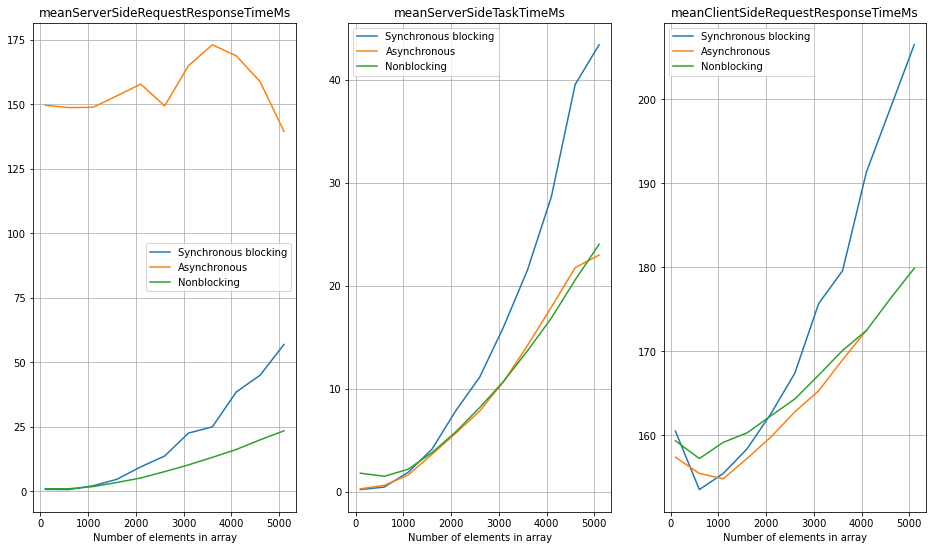

In [14]:
fig, ax = plot_comparison(ParameterName.N)

In [15]:
fig.savefig("number-of-elements-plot.pdf")

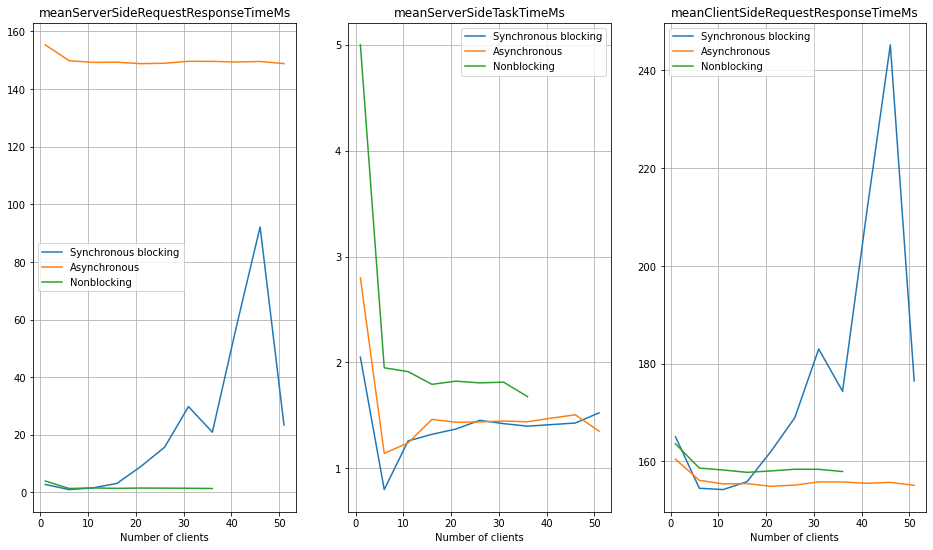

In [16]:
fig, ax = plot_comparison(ParameterName.M)

In [17]:
fig.savefig("number-of-clients-plot.pdf")

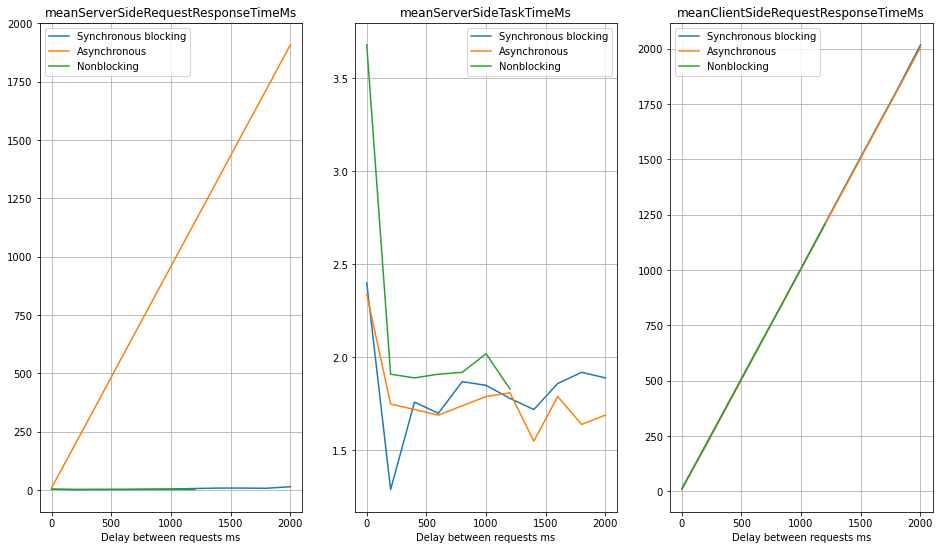

In [18]:
fig, ax = plot_comparison(ParameterName.DELTA)

In [19]:
fig.savefig("delta-plot.pdf")